<a href="https://colab.research.google.com/github/JiscDACT/PositivelySkewed/blob/main/Stats103%20(GLMs)/Stats_103_Generalised_Linear_Models_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stats 103 Generalised Linear Models

This tutorial will introduce you to statistical modelling in Python including the following topics:

* Linear Regression
* Logistic Regression including prediction
* Poisson Regression

Using libraries:
- **statsmodels**: includes functions to apply statistical models


We will also be using the following:
- **seaborn & matplotlib**: For plotting results
- **pandas**: For data manipulation
- **numpy**: For mathematical functions, array and matrices

Also will dip into using these libraries:

- **matplotlib**: For plotting
- **scipy**: For algorithms for statistics

In [ ]:
import seaborn as sns
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

# 1 - Linear Regression

*   Linear regression is used to model, or predict continuous outcome data (e.g. predicting basketball teams height by their weight)
*   Linear regression is a type of supervised statistical model.
*   Supervised means that we have labelled outcome data (e.g. we have the measured heights)
*   It is used to describe the relationship between one or more independent (explanatory) quantitative variables (e.g. weight) and a dependent (outcome) variable (e.g. height)
*   The inner workings of a linear regression model is important to understand as it is the basis of a class of statistical models called 'Generalised Linear Models' (including logistic regression and poisson regression which we also cover in this tutorial)


We will use the Iris dataset to illustrate concepts of linear regression. The Iris dataset has 50 samples from three species of Iris flower (Setosa, Virginica and Versicolor). Four features are measured (in cm) from each sample: Length and Width of both the Sepals and Petals.

Load and view the "Iris" dataset.

In [ ]:
iris = sns.load_dataset("iris")

In [ ]:
iris.head()

## 1.1 Linear Regression Plot

To model sepal length using petal length, firstly it can help to understand the relationship by plotting the data.

We use seaborn below to do this and plot a regression line to summarise the relationship (seaborns regplot does this automatically).

In [ ]:
sns.regplot(x="petal_length", y="sepal_length", data=iris)

A general statement describing this plot would be as petal length increases, sepal length also increases. There also appears to be a cluster of values in lower dimensions and a cluster higher up - this dataset is often used to illustrate cluster analysis (not covered in this tutorial).

To fit a linear model we use the statsmodels package and import ols.
Ordinary Least Squares (OLS) regression is a common technique for estimating coefficients of linear regression equations.

OLS involves fitting a line so the sum of the squared distance from each point to the regression line (residuals) are minimised.

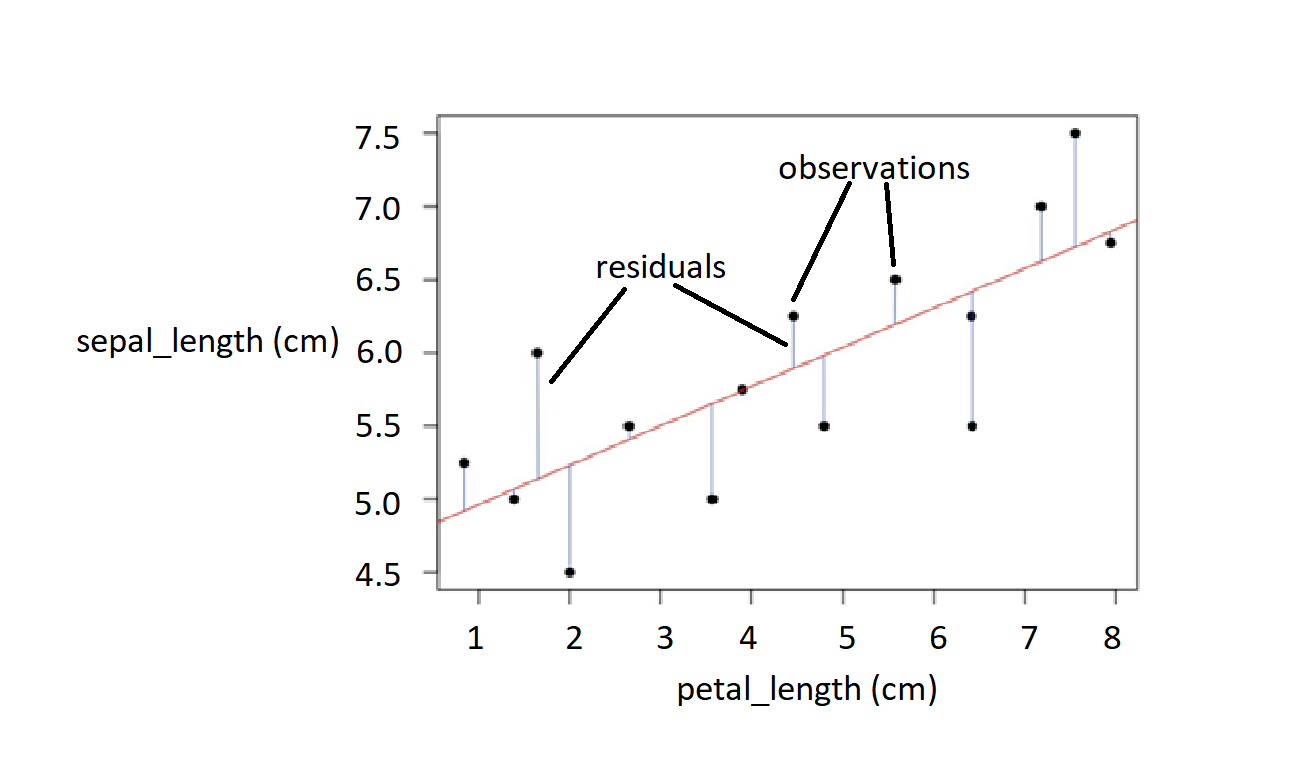

Coefficients are estimates of the unknown population parameters and describe the relationship between the predictor variable (petal length) and the response (sepal_length).

They are also called beta values or beta coefficients and are indicated in the equation in orange text below.

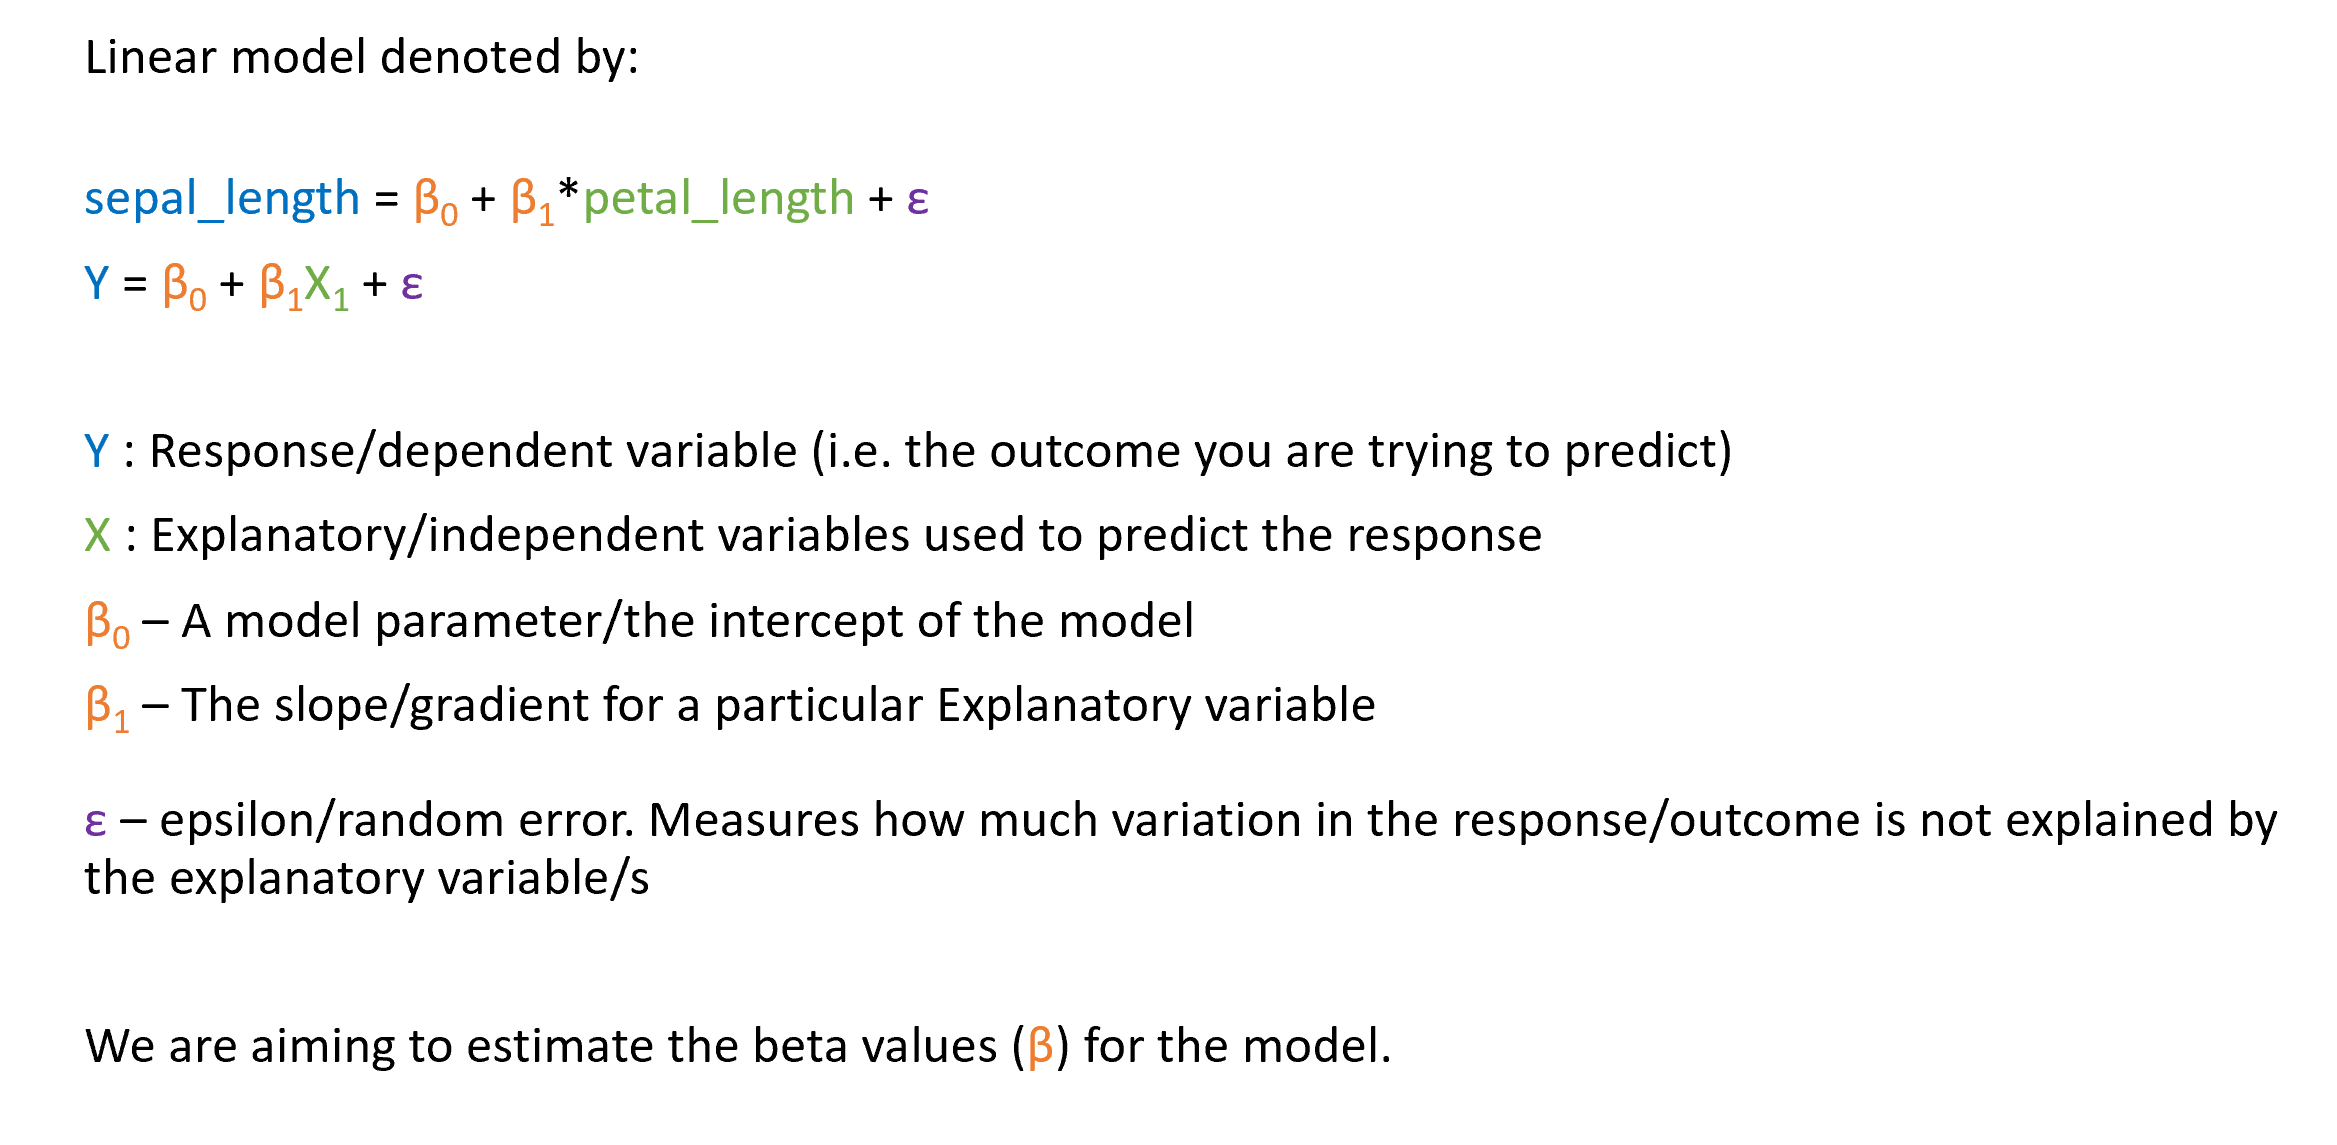

## 1.2 Fitting a Linear Regression Model

Import ols from statsmodels to fit a linear regression model

In [ ]:
from statsmodels.formula.api import ols

The following code models the relationship of both petal length and species on sepal length. You would expect different species to have different sepal lengths.

In [ ]:
linear_mod = ols(formula = 'sepal_length ~ petal_length + species', data = iris).fit()

You can print the model parameters (or coefficients) by accessing 'params' as part of the linear_mod output

In [ ]:
print(linear_mod.params)

You can now write the model equation and insert different species types and petal lengths to predict the sepal lengths

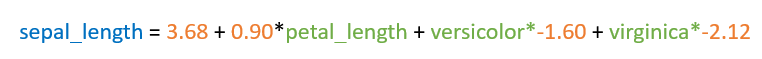

setosa has been coded as the baseline and so you would replace versicolor with '0' and virginica with '0' for the calculation. This is discussed in detail below.

The following code sums up the number for each species of plant.

In [ ]:
iris.groupby('species').size()

## 1.3 Coding Categorical variables for modelling (Contrasts)
Categorical variables can be coded in different ways in a model e.g. for species there are three possible labels - setosa, versicolor and virginia. 

Typically dummy coding would split this one species column into 3 columns and produce a 0/1 to indicate whether it belonged to that species and you would see a separate coefficient for each species. However, in the above model the categorical variables have used a different type of contrast coding where setosa has been coded as the baseline factor. 

To read more about contrasts, click [here](https://www.statsmodels.org/dev/examples/notebooks/generated/contrasts.html). For this tutorial you only need to know how to interpret these coefficients but it is good to be aware of the impact that different contrasts can have on the interpretation of your model and when using different packages and coding languages.

## 1.4 Interpretting the output

When applying the model, the outputs you are most interested in are the coefficients, P value (P>|t|) and confidence intervals.

Positive coefficients mean that as the petal length increases, the sepal length also increases. Negative coefficients mean that if the species is a virginica or a vericolor compared to a setosa as baseline, the sepal length decreases.

For the p-value, 0.05 is typically the cutoff used (below this value the coefficient is significant (has a signficant effect) on the relationship with the output variable). A p value over 0.05 is considered non significant and you may want to consider removing the variable to make the model more parsimonius (not always though!).

Confidence intervals use the standard error (SE) [0.025, 0.975] and enclose the coefficient. For a large sample, a 95% confidence interval is obtained as the values 1.96×SE (+/- the coefficient).

For example, the petal length coefficient is 0.90 with a 95% CI (0.77, 1.03). This gives us the uncertainty around the estimate, it could be somewhere between 0.77 and 1.03.

i.e it contains the range of values that you can be 95% confident contains the true value for the population (as we have just used a sample - this is known as statistical inference).



You can call the model summary by using the summary() function on the fitted linear model (which we called linear_mod). This prints the entire model output with extra information/detail.

In [ ]:
print(linear_mod.summary())

## 1.5 Linear Regression Exercises

1. Load in the 'tips' dataset provided from seaborn and view the first few rows to understand the data. Food servers’ tips in restaurants can be influenced by many factors. The following dataset includes cost of the total bill, tip given, sex of person paying the bill, whether there was a smoker in the party, the day, time and size of party. More information on the dataset can be found [here](https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset).

In [ ]:
#@title Click here for Answers
tips = sns.load_dataset("tips")
tips.head()

2. We want to look at the relationship between total_bill on amount of tip. Plot a regression plot to have a look at the relationship between the variables.

In [ ]:
#@title Click here for Answers
sns.regplot(x="total_bill", y="tip", data=tips)

3. Complete the statement

In [ ]:
#@title Choose the correct words to complete the following statement: *As total bill increases/decreases on the whole the amount of tip increases/decreases*' { run: "auto" }
increases_decreases1 = "increases" #@param ["increases", "decreases"]
increases_decreases2 = "decreases" #@param ["increases", "decreases"]

print('As total bill', increases_decreases1, 'on the whole the amount of tip', increases_decreases2)


In [ ]:
#@title Click here for Answers
print("As total bill increases on the whole the amount of tip increases")

4. Fit a linear model which describes the relationship between total bill and sex on the dependent variable tip.

In [ ]:
#@title Click here for Answers
linear_mod = ols(formula = 'tip ~ total_bill + sex', data = tips).fit()

Inspect the summary of the model output

In [ ]:
#@title Click here for Answers
print(linear_mod.summary())

5. Write an equation which predicts the tip someone would get if they were female and the total bill was £500

In [ ]:
#@title Click here for Answers
tip = 0.91 + 0.11*500 + 0.03*1
print('£' + str(tip))

# 2 - Logistic Regression

We will now use the same library 'statsmodels' and code format to fit a logistic regression model. Remember that logistic regression and poisson regression build upon the linear regression model (hence generalised linear models).

Logisitic Regression is used when you have a binary outcome (Yes/No).

For example, attending a top 20 University versus not attending a top 20 University.

Instead of predicting value Y (outcome) from predictor variable/s X – we predict the probability of Y occurring given known values of X.

Estimation of probabilities from a logistic regression are between 0,1.

Values of the beta coefficients are estimated using maximum likelihood estimations - instead of the ordinary least squares (OLS) method we saw with linear regression.

This model is linked to a linear equation using the **logit** function (links the probability of an event to a linear equation).

The following equation therefore looks similar to the linear regression equation we introduced above.

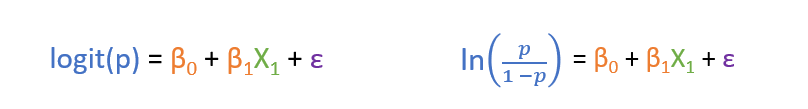

Load the titanic dataset which comes with seaborn and view the first few rows. It contains data on 891 people who went on the titanic voyage and information such as class, age, sex. The binary outcome we want to model is whether the person survived or not and this is affected by different features.

In [ ]:
titanic = sns.load_dataset("titanic")

In [ ]:
titanic.head()

In [ ]:
len(titanic)

## 2.1 Logistic Regression Plot

You can also produce a regression plot for logistic regression. Below we look at the relationship between age and whether someone survived or not.

In [ ]:
# Plots for continuous predictors
sns.regplot(x = 'age', y = 'survived', 
            y_jitter = 0.05,
            data = titanic, 
            logistic = True)

plt.show()

As age increases, we see that survival decreases.

## 2.2 Fitting a Logistic Regression Model

The following code imports glm from the statsmodels Python Package.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

We can now fit the logistic regression model which looks at the affect of sex on survival. The formula follows the same syntax as seen for the linear regression equation and saves the model as log_mod.

In [ ]:
log_mod = glm(formula = 'survived ~ sex',
                data = titanic,
                family = sm.families.Binomial()).fit()

## 2.3 Interpreting the Output

The code below uses the summary() function (as with the linear regression model) to look at the model outputs

In [ ]:
print(log_mod.summary())

As with linear regression we are mainly interested in the coefficient (coef), p value (P>|z|) and confidence intervals.

Logistic regression is often used to either...

1. describe the effect of a predictor on an outcome in the form of odds ratios.

2. or as a supervised prediction model to predict the probability of an outcome (the probability of someone surviving based on different features)

3. or to predict the class (survived or not survived)

Odds ratios are straight forward to calculate - they are just the exponential of the beta coefficients.

They indicate the change in odds resulting from a unit change in the predictor.

Odds = probability of an event occurring/probability of that event not occurring.


* An odds ratio of 1 means that the explanatory variable does not affect the odds of survival. 
* An odds ratio of more than 1 means that there is a higher odds of survival for an explanatory variable. 
* An odds ratio of less than 1 is associated with lower odds of survival.




We can get the beta coefficients from the model output using .params

In [ ]:
# Model coefficients
print('Model coefficients: \n', log_mod.params)

You can access the different parameters using indexing, so [0] gives the intercept, [1] gives the sex coefficient and [2] gives the age coefficient.

In [ ]:
log_mod.params[0]

To use the exponential in a mathematical function, you can use the exponential function which comes with the numpy (alias np) library: np.exp

Take the exponential to get the odds ratio for sex.

In [ ]:
#Take exponential of the coefficient
print('Odds ratio for Sex: ', round(np.exp(-2.51),3), '95% CI:', round(np.exp(-2.84),3), ',', round(np.exp(-2.19),3) )


Alternatively you can extract the estimated parameters and confidence intervals, combine them into a dataframe and apply NumPy's exp() function to the whole dataframe. to get a dataframe of the Odds Ratios.

In [ ]:
odds_ratios = pd.DataFrame(
    {
        "OR": log_mod.params,
        "Lower CI": log_mod.conf_int()[0],
        "Upper CI": log_mod.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

To write this up and interpret it: Men (compared to women at baseline)  have lower odds of survival with an adjusted Odds Ratio of 0.09 (95% CI: 0.06, 0.12)

## 2.4 Predicted Probabilities

Another application of logistic regression is to determine the probability of survival given certain predictor variables. This can be calculated by rearranging the logistic regression equation.

Our current equation can be written as the following:

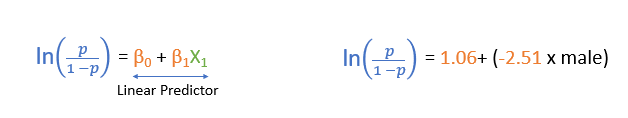

We can get the probabilties by rearranging to this following format:


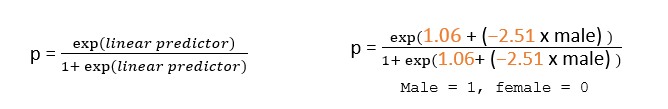



To manually calculate the probability using the above equation we can use the following code:

In [ ]:
numerator = np.exp((1.0566) + (-2.5137 * 1)) 
denominator = 1 + np.exp((1.0566) + (-2.5137 * 1))
probability = numerator/denominator

print(probability)

Alternatively you can create the probability of surviving the titanic for a male by creating a new dataframe with the values and applying the logistic regression model

In [ ]:
prediction_individual = pd.DataFrame({'sex': ['male']})
log_mod.predict(prediction_individual)

This tells us that there is a 0.19 probability of a male surviving the Titanic.

We can also get Python to do these calculations for us simply and quickly using .fittedvalues

The below code adds the probabilities onto the dataframe as an extra column and if you sort by sex you see that the predicted probability matches our manual calculation for males.

In [ ]:
#Get the predicted probabilties using fittedvalues function
titanic['predictions_survival'] = log_mod.fittedvalues

The following code imports additional table functionalities for use in Google Colab.

In [ ]:
#Load the following for interactive tables
#%load_ext google.colab.data_table

from google.colab import data_table
data_table.enable_dataframe_formatter()

The code below outputs the table to investigate the new 'predictions_survival' column.

In [ ]:
data_table.DataTable(titanic, include_index=False, num_rows_per_page=10)

The following code removes the extra table functionalities that we implemented above.

In [ ]:
# Return to native pandas dataframe
data_table.disable_dataframe_formatter()

## 2.5 Confusion Matrix

A confusion matrix allows you to determine the predictive power of the model.

You would usually implement the confusion matrix on a new set of data (one which you have not used to build the model) to avoid inflating the model performance (if you assess a model on the data it has been built it is more likely to have high performance). 

You can use the model to compute probabilities and then classify these using a threshold or cutoff value.

We use the numpy package to implement a threshold which we will set as 0.6


In [ ]:
threshold = 0.6

For predictions which are greater than 0.6 we assign as 1, otherwise a 0 and produce a new variable called predicted_class (if else statement for generating new variables)

In [ ]:
titanic['predicted_class'] = np.where(titanic['predictions_survival']> threshold, 1,0)

Count the number in each class (0 not survived, 1 survived)

In [ ]:
titanic['predicted_class'].value_counts()

We then produce a 2x2 contingency table to assess model performance. This compares the predicted classes (predicted by the model) with the actual classes (what was actually in the data).

The confusion matrix summarises how many observations the model classifies correctly. 

The below code produces the confusion matrix.
The observed or actual classes are the rows and predicted are the columns.

In [ ]:
print(pd.crosstab(titanic['survived'], titanic['predicted_class'],
                  rownames=['Observed'], colnames=['Predicted'],
                  margins = True))

Looking at this, there were 468 people who were predicted to die and who actually died.

There were also 233 who were predicted to survive and who actually survived.

The other numbers are where there is disagreement between observed data and predicted classes.

Changing the threshold alters the balance of these numbers.

A ROC curve plots the trade off between sensitivity and 1-specificity (calculated from the 2x2) for all available thresholds but is beyond the scope of this tutorial.

## 2.6 Logistic Regression Exercises

We will use the penguins dataset to predict whether a penguin is male or female based on attributes such as bill length, flipper length and body mass.

1. Load in the 'penguins' dataset provided from seaborn and view the first few rows to understand the data

In [ ]:
#@title Click here for Answers
penguins = sns.load_dataset("penguins")
penguins.head()

2. Drop rows where there are NAs before modelling

In [ ]:
#@title Click here for Answers
penguins = penguins.dropna() 

3. Produce a column which is 0's for Females and 1's for Males called sex_int. There are lots of different ways of doing this.

In [ ]:
#@title Click here for Answers
penguins.sex = penguins.sex.map(dict(Male=1, Female=0))

In [ ]:
#@title Click here for Answers
penguins.groupby(['sex']).size()

4. Produce a logistic regression plot for body_mass_g by whether the penguin is male or female. Interpret the plot.

In [ ]:
#@title Click here for Answers
sns.regplot(x = 'body_mass_g', y = 'sex', 
            y_jitter = 0.05,
            data = penguins, 
            logistic = True)

plt.show()

5. Import glm from statsmodels as given in the examples


In [ ]:
#@title Click here for Answers
import statsmodels.api as sm
from statsmodels.formula.api import glm

6. Fit a logistic regression model with the following explanatory variables: 

body_mass_g, flipper_length_mm, species

Dependent variable:
sex

In [ ]:
#@title Click here for Answers
log_mod = glm(formula = 'sex ~ body_mass_g + flipper_length_mm + species',
                data = penguins,
                family = sm.families.Binomial()).fit()

6. Produce the model output summary

In [ ]:
#@title Click here for Answers
print(log_mod.summary())

7. Manually calculate the adjusted odds ratio of flipper_length_mm on sex with 95% Confidence Intervals

In [ ]:
#@title Click here for Answers
#Take exponential of the coefficient
print('Odds ratio for flipper_length_mm: ', round(np.exp(0.0778),3), '95% CI:', round(np.exp(0.011),3), ',', round(np.exp(0.145),3) )


8. Interpret the Odds Ratio

In [ ]:
#@title Click here for Answers
print("For every unit increase in flipper length (i.e 1 mm) there is an 8% increase in the odds of being a male penguin")

Note you may consider interactions in a real life application of logistic regression. For instance, different species will have different flipper lengths and body mass. 

Consider interactions when the effect of one variable changes for various subgroups of the other.

See this [webpage](https://www.theanalysisfactor.com/interpreting-interactions-in-regression/) for a further explanation of interactions.

9. Determine the probability of being a male penguin if they are an Adelie species, body mass is 3075g and flipper length 250mm. You can use whichever method you prefer (manual, using predicted values on new dataframe or applying fitted values to a dataframe).

In [ ]:
#@title Click here for Answers
prediction_individual = pd.DataFrame({'body_mass_g': [3075], 'flipper_length_mm': [250], 'species': 'Adelie' })
log_mod.predict(prediction_individual)*100


In [ ]:
#@title Click here for Answers
numerator = np.exp((-39.8737) + (-0.6395*0) + (-11.5547*0) + (0.0068*3075) + (0.0778*250))
denominator = 1 + np.exp((-39.8737) + (-0.6395*0) + (-11.5547*0) + (0.0068*3075) + (0.0778*250))
probability = numerator/denominator

print(probability)

# 3 - Poisson Regression

We will now use the same library 'statsmodels' and code format to fit a poisson regression model. Poisson regression builds upon the original linear regression model (hence considered a generalised linear model).



* Poisson regression is used to model count data 
* Count data can use the Poisson Distribution or negative binomial distribution 
* If the variance is roughly equal to the mean, then a Poisson regression model typically fits a dataset well. If the variance is significantly greater than the mean (a scenario called 'overdispersion'), then a negative binomial regression model typically fits the data better.
* Events need to be independent of each other (i.e. the occurrence of one event does not affect the probability of another event)
* The average rate (i.e. events per time, distance etc) is constant
* Two events cannot occur at the same time.



* Examples of data where Poisson regression may be appropriate include:
1.  The number of goals scored in a football match
2.  The number of people in the Bristol Jisc office on a Monday
3.  The number of visitors to a website

Count data tend to have lots of 0s making it right skewed. Count data have a lower bound (0), but not an upper bound (infinity) hence needing to use a different model to a linear model.


## Log Link Function

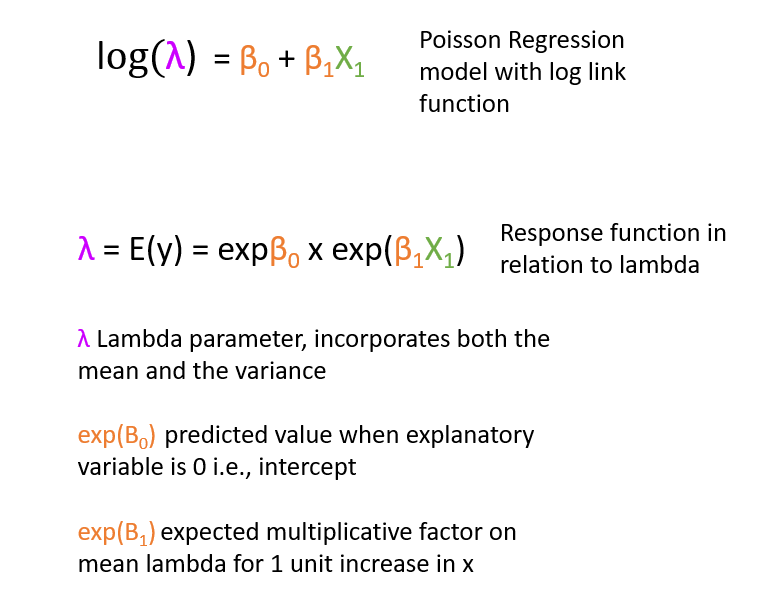

This model is linked to a linear equation using the **log link** function.

The parameter **lambda** incorporates both the mean and the variance.

Parameters are all on the log scale so we need to exponentiate them to get the response function in relation to lambda.


## 3.1 Visualising the Poisson Distribution

We can use the 'random' function from numpy to generate a poisson distribution and then visualise it using Seaborn's displot function. Use the sliders to view how distribution changes as lambda value changes.

Make sure you run/execute the cell before using the sliders. You should see a change in the distribution plot as you change the sliders.

In [ ]:
#@title Visualising Poisson Distribution { run: "auto", vertical-output: true }
lam = 5 #@param {type:"slider", min:0, max:100, step:1}
size = 21138 #@param {type:"slider", min:50, max:100000, step:1}

sns.distplot(random.poisson(lam=lam, size=size), kde=False)
plt.show()

**Question**: What happens to the distribution when lambda is equal to 5 versus when it is 25 (for the same sample size e.g around 20,000)?

In [ ]:
#@title Click here for Answers
print("As lambda increases, the distribution becomes less positively skewed and more normally distributed")

## 3.2 Getting the Count Data
The next 4 cells call an R package which stores statistical datasets and then loads it back into Python for our use.
This Satellite Crab data will be used to demonstrate Poisson Regression

In [ ]:
# activate R magic (allows you to use multiple coding languages per notebook)
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%R
install.packages('GLMsData')
library('GLMsData')

In [ ]:
%%R
data("hcrabs")

In [ ]:
%R -o hcrabs -o hcrabs
# Import data from R into Python

The data is now ready to view in our Google Colab workspace.

View the Satellite Crab data. 

Background behind dataset:
A nesting female horseshoe crab may have male crabs residing nearby, called satellites. Brockmann (1996) investigated factors (including the female crab's color, spine condition, weight, and carapace width) which may influence the presence/absence of satellite males.

More information on the data can be found [here](https://https://rdrr.io/cran/rsq/man/hcrabs.html).



In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

data_table.DataTable(hcrabs, include_index=False, num_rows_per_page=10)

## 3.3 Plot response data to assess the distribution

We can use the Seaborn library to plot the distribution of the number of satellites.

In [ ]:
sns.distplot(hcrabs['Sat'])

plt.show()

##3.4 Fitting a Poisson Regression Model

The following code imports glm from the statsmodels Python Package. Note it uses the same syntax/arguments as the linear and logistic regression we have covered - we just change the family argument to be equal to Poisson.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

We fit a model that looks at the association of female crab width on the number of male satellites:

In [ ]:
p_mod = glm('Sat ~ Width',
    data = hcrabs,
    family = sm.families.Poisson()).fit()


As for the previous GLMS, we can print the model output using the summary() argument. The Poisson model uses MLE (Maximum Likelihood Estimation) as with logistic regression to estimate parameters so it gives a familiar output.

In [ ]:
print(p_mod.summary())

## 3.5 Interpretting the Output

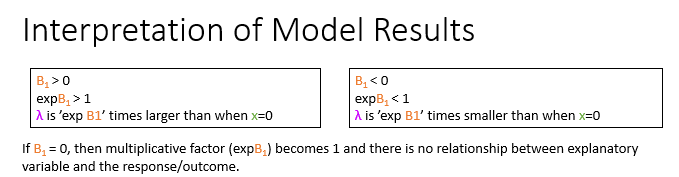

The beta coefficient which we have estimated above is 0.1640 (i.e. the effect of the width of the female crab on the number of male satellites, the coefficient).

This coefficient is on the log scale, so we exponentiate this to make the response equal to lambda.

If beta is over zero then by exponentiating it, this becomes greater than one and we can say the mean lambda is exp(beta) times larger per unit increase (and vice versa as per the summary card above).

For our satellite crab example, the equation becomes the following:

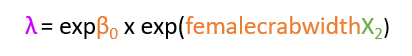


We exponentiate the 0.1640 using numpys exponential function

In [ ]:
np.exp(p_mod.params[1])

To interpret this, for 1 unit increase in the width of the female crab, the mean response/lambda (i.e. the mean number of male satellites) increases by 1.18 times (18% increase in the mean number of male satellites).

Bigger is better for crabs! 🦀 

You can get the confidence intervals using the same piece of coding as seen with logistic regression, just substitute the model name (p_mod)

In [ ]:
expbeta = pd.DataFrame(
    {
        "expbeta": p_mod.params,
        "Lower CI": p_mod.conf_int()[0],
        "Upper CI": p_mod.conf_int()[1],
    }
)
expbeta = np.exp(expbeta)
print(expbeta)

You can use the confidence intervals in the interpration where you know that the number of satellites will increase by at least 1.13 times (13% increase in the mean number of male satellites) and at the most 1.23 times (23% increase in the mean number of male satellites).

## 3.6 Predicting Expected number of male satellites (i.e. Lambda)

You can use the Poisson model to determine the expected number of male satellites.

Firstly we obtain the mean/average female crab width using numpys mean function. We will be assessing the effect of crab width on the number of male satellites in our Poisson model.

In [ ]:
np.mean(hcrabs['Width'])

The average female crab width is 26.3cm. We now want to know what lambda is (i.e. mean number of male satellites) at the average female width we calculated above.

In [ ]:
lambda_avgwidth = np.exp(p_mod.params[0]) * np.exp(p_mod.params[1] * np.mean(hcrabs['Width']))
lambda_avgwidth

At average width, a female crab will have on average (mean): 2.74 satellites

## 3.7 Predicted Probabilities

We can assess questions such as 'what is the predicted probability of 12 male satellites when Female Width is equal to 35cm?'

This is a bit more involved than predicted probabilities for logistic regression as first of all you need to determine the mean lambda for a particular width (using linear predictor).

You then need to calculate the probability that the number of satellite crabs equals 12 for a particular width.

The code below gives the mean number of satellites for a width of 35cm

In [ ]:
lambda_35width = np.exp(p_mod.params[0]) * np.exp(p_mod.params[1] * 35)
lambda_35width

So we expect on average 11.44 satellites for a female crab at width 35cm.

Now for the probability we rearrange the equation to the following:

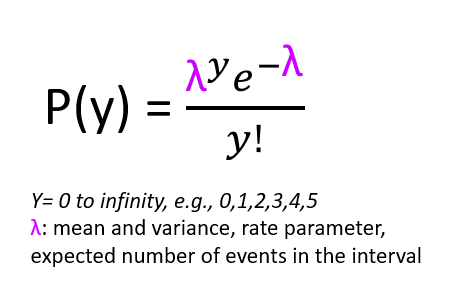

Where you see the y! - the exclamation mark '!' stands for a factorial. 

Factorial 12 is the equivalent of 12x11x10x9x8x7x6x5x4x3x2x1 = 479,001,600

The below code cell will give you the same result and we use this as part of the above equation.

In [ ]:
denominator = np.math.factorial(12)
print(denominator)

In [ ]:
numerator = (np.power(11.44, 12))*(np.power(np.e, -11.44))
denominator = np.math.factorial(12)

probability_of_12 = numerator/denominator
print(probability_of_12)

There is an 11.3% probability that a female crab with 35 cm back width has 12 male satellite crabs.

You can achieve this more quickly and less manually using the scipy library and poisson distribution function which takes care of the calculation for you. The below codes gives the predicted probability of 12,11,10,9 and 8 male satellites for the mean number of satellites of 11.44.

In [ ]:
from scipy.stats import poisson

X = [8,9,10,11,12]
lbda = 11.44

# Probability values
poisson_pd = poisson.pmf(X, lbda)
probs = pd.DataFrame(poisson_pd, columns=['Probability']) 
  
# Using 'expected_satellites' as the column name
# and equating it to the list
probs['expected_satellites'] = X

probs

We can also graphically plot the probability distribution using matplotlib

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - Number of Satellite Crabs", fontsize="18")
plt.title("Poisson Distribution - Number of Satellite Crabs Vs Probability", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

You may have a similar question which asks what is the probability of more than 12 male crabs for female crab width of 35cm.

X.cdf(12) is equivalent to P(X<=12)

In [ ]:
from scipy import stats

X=stats.poisson(11.44)

print(1-X.cdf(12))

OR what is the probability of less than or equal to 12 male crabs for female width of 35cm?

In [ ]:
from scipy import stats

X=stats.poisson(11.44)

print(X.cdf(12))

##3.8 Poisson Regression Exercises

We will be using the 'apprentices' dataset which records the number of apprentices moving to Edinburgh across a 25 year period.

A data frame with 33 observations on the following 5 variables.

**Dist** the distance from Edinburgh (unit unknown, presumably miles); a numeric vector

**Apps** the number of apprentices moving to Edinburgh from the given county (given in row labels);
a numeric vector

**Pop** the population (in thousands) of the given county; a numeric vector

**Urban** the degree of urbanization as measured by the percentage of the population living in urban
settlements; a numeric vector

**Locn** the location of the county relative to Edinburgh; a factor with levels North, South and West



1. Run the below cells to import the data

In [ ]:
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R
install.packages('GLMsData')
library('GLMsData')

In [ ]:
%%R
data("apprentice")

In [ ]:
%R -o apprentice -o apprentice
# Import data from R into Python

2. View and explore data

In [ ]:
#@title Click here for Answers
apprentice.head(100)

2. Fit a Poisson Model to model the affect of distance (dist) from Edinburgh on the number of apprentices moving to Edinburgh (Apps) and print the summary.

In [ ]:
#@title Click here for Answers
p_mod = glm('Apps ~ Dist',
    data = apprentice,
    family = sm.families.Poisson()).fit()

In [ ]:
#@title Click here for Answers
print(p_mod.summary())

3. For each unit increase in distance, how much does the mean number of apprentices reduce by?

*Hint - take the exponential of the 'Dist' parameter to help you determine this*

In [ ]:
#@title Click here for Answers
np.exp(p_mod.params[1])
# For each unit increase in distance, the mean number of apprentices reduces by 3% (0.97-1)
#i.e. further away, less migration to Edinburgh

4. What is the minimum and maximum decreases using confidence intervals to work this out?

In [ ]:
#@title Click here for Answers
expbeta = pd.DataFrame(
    {
        "expbeta": p_mod.params,
        "Lower CI": p_mod.conf_int()[0],
        "Upper CI": p_mod.conf_int()[1],
    }
)
expbeta = np.exp(expbeta)
print(expbeta)

# For 1 unit increase in distance the mean response/lambda (i.e. the mean number of migrating apprentices) decreases by 0.03 times (3% decrease in the mean number of migrating apprentices).
# The number of people migrating will decrease at the most by 4% and by least 3%.

5. Determine expected number of migrating apprentices at a distance of 52.



In [ ]:
#@title Click here for Answers
lambda_52dist = np.exp(p_mod.params[0]) * np.exp(p_mod.params[1] * 52)
lambda_52dist

6. Determine the predicted probability of a migration of 100 for a distance of 20.

In [ ]:
#@title Click here for Answers
from scipy.stats import poisson

X = [20]
lbda = 23.53

# Probability values
poisson_pd = poisson.pmf(X, lbda)
probs = pd.DataFrame(poisson_pd, columns=['Probability']) 
  
# Using 'expected_satellites' as the column name
# and equating it to the list
probs['expected_migrations'] = X

probs

#6.7%

# Feedback

Please complete the below anonymous feedback.

In [1]:
#@title
%%html

<iframe src="https://docs.google.com/forms/d/e/1FAIpQLScFHpohjdhjCG5t64mo5h-hpLuqYnWr0OiJy9LmsEbPCzQE8w/viewform?embedded=true" width="1250" height="600" frameborder="0" marginheight="0" marginwidth="0">Loading…</iframe>